# 3)	Faça um algoritmo para prever o valor de um carro com o dataset “CarPrice.csv”, verifique a melhor correlação entre o target “Price” e outra feature do dataset, a correlação deve resultar em uma regressão linear. Apresente 3 modelos diferentes de Regressão linear e a métrica de erro R². Informe três valores para X e apresente o resultado de Y nos três modelos criados.



In [221]:
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.linear_model import LinearRegression
import sklearn.metrics
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import numpy as np


In [222]:
df = pd.read_csv("CarPrice.csv", index_col= 0)

df =df.drop(columns=["CarName"], axis=1)

# LABELS = df.columns  

# encoder = LabelEncoder()
# for col in LABELS:
#     if df[col].dtype == 'O':
#         df[col] = encoder.fit_transform(df[col])
#     elif df[col].dtype == 'bool':
#         df[col] = df[col].astype('int')


y = df['price'].values.reshape(-1,1)
x = df["enginesize"].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)


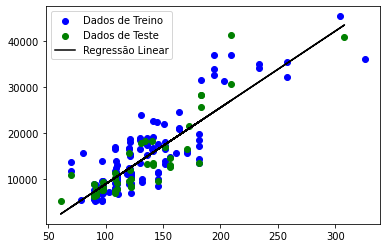

Score: 79.52%
Predict para o valor  um motor de 153: 17714.398343796805
Predict para o valor  um motor de 340: 48831.064847267015
Predict para o valor  um motor de 90: 7231.2433185635255


In [228]:
# Regressão Linear
reg = LinearRegression()
reg.fit(x_train,y_train)

plt.scatter(x_train,y_train,color='b',label="Dados de Treino")
plt.scatter(x_test,y_test,color='g',label="Dados de Teste")

plt.plot(x_test,reg.predict(x_test),color='black',label="Regressão Linear")
plt.legend()
plt.show()

print(f"Score: {reg.score(x_test,y_test)*100:.2f}%")
print(f"Predict para o valor  um motor de 153: {reg.predict(np.array(153).reshape(-1,1))[0][0]}")
print(f"Predict para o valor  um motor de 340: {reg.predict(np.array(340).reshape(-1,1))[0][0]}")
print(f"Predict para o valor  um motor de 90: {reg.predict(np.array(90).reshape(-1,1))[0][0]}")



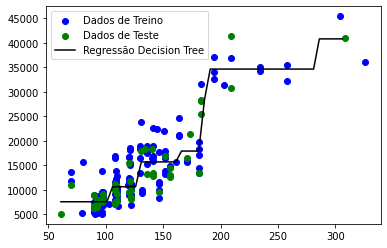

Score: 91.45%
Predict para o valor  um motor de 153: 15715.75
Predict para o valor  um motor de 340: 40786.67
Predict para o valor  um motor de 90: 7596.82


In [249]:
#Decision Tree
dtree = DecisionTreeRegressor(random_state=0,max_depth=3)
dtree.fit(x,y)

x_grid = np.arange(min(x_test),max(x_test),5)
x_grid = x_grid.reshape((-1,1))
plt.scatter(x_train,y_train,color='b',label="Dados de Treino")
plt.scatter(x_test,y_test,color='g',label="Dados de Teste")
plt.plot(x_grid, dtree.predict(x_grid),label = "Regressão Decision Tree",color ='black')
plt.legend()
plt.show()

print(f"Score: {dtree.score(x_test,y_test)*100:.2f}%")
print(f"Predict para o valor  um motor de 153: {dtree.predict(np.array(153).reshape(-1,1))[0]:.2f}")
print(f"Predict para o valor  um motor de 340: {dtree.predict(np.array(340).reshape(-1,1))[0]:.2f}")
print(f"Predict para o valor  um motor de 90: {dtree.predict(np.array(90).reshape(-1,1))[0]:.2f}")

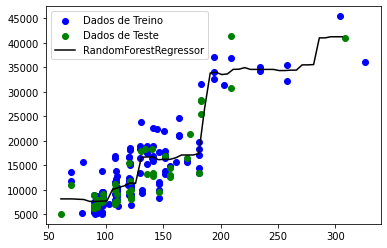

Score: 91.02%
Predict para o valor  um motor de 153: 16236.63
Predict para o valor  um motor de 340: 38397.87
Predict para o valor  um motor de 90: 7668.40


In [248]:
#random Forest 
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=3,n_estimators=100)
regr.fit(x_train, y_train.ravel())

x_grid = np.arange(min(x_test),max(x_test),5)
x_grid = x_grid.reshape((-1,1))

plt.scatter(x_train,y_train,color='b',label="Dados de Treino")
plt.scatter(x_test,y_test,color='g',label="Dados de Teste")
plt.plot(x_grid, regr.predict(x_grid) ,color ='black', label="RandomForestRegressor")
plt.legend()
plt.show()

print(f"Score: {regr.score(x_test,y_test)*100:.2f}%")
print(f"Predict para o valor  um motor de 153: {regr.predict(np.array(153).reshape(-1,1))[0]:.2f}")
print(f"Predict para o valor  um motor de 340: {regr.predict(np.array(340).reshape(-1,1))[0]:.2f}")
print(f"Predict para o valor  um motor de 90: {regr.predict(np.array(90).reshape(-1,1))[0]:.2f}")